# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1: Shay Yeffet 3985
# student 2: Omer Droub 4004
# student 3: Yoni Audi 7346

## Part 2 - Initial Preparations
You could add as many code cells as needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from scipy.stats import zscore
from scipy import stats
from sklearn.model_selection import KFold

In [ ]:
# Load training data into a DataFrame
train_data = pd.read_csv('housing_train.csv')

# Load test data into a DataFrame
test_data = pd.read_csv('housing_test.csv')

# Show the first few rows of the training data
train_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,4.0179,46.0,4.158690,1.032746,512.0,1.289673,34.07,-118.35,3.500
1,2.7002,6.0,4.149245,1.179989,4092.0,2.287311,34.05,-117.31,0.883
2,1.2762,17.0,3.432331,1.022556,1325.0,2.490602,34.42,-119.69,2.536
3,4.9342,23.0,5.735798,1.053201,4580.0,4.129847,34.04,-117.93,1.810
4,2.2755,21.0,4.064607,0.962079,2109.0,2.962079,32.58,-117.11,1.250


In [ ]:
# Show the first few rows of the test data
test_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,5.3254,32.0,5.786260,1.033079,982.0,2.498728,34.29,-119.27,3.852
1,5.3032,52.0,5.095745,1.028369,980.0,3.475177,34.08,-118.12,2.457
2,4.1679,41.0,6.617486,1.371585,915.0,2.500000,37.05,-122.05,2.013
3,3.6429,28.0,5.249180,1.009836,848.0,2.780328,38.69,-121.41,1.052
4,2.7457,17.0,11.183267,2.107570,675.0,2.689243,38.88,-119.99,1.078


In [ ]:
train_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,3.863517,28.650678,5.412479,1.093546,1424.287609,3.101201,35.631452,-119.566283,2.065267
std,1.878577,12.623994,2.088680,0.378594,1139.012630,11.587773,2.137537,2.006552,1.151219
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.564375,18.000000,4.448665,1.005988,789.000000,2.431070,33.930000,-121.800000,1.192000
50%,3.536650,29.000000,5.225511,1.048780,1167.000000,2.816355,34.250000,-118.490000,1.796000
75%,4.744375,37.000000,6.046629,1.099691,1722.000000,3.281612,37.710000,-118.000000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
test_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000,4128.000000
mean,3.899288,28.594719,5.495082,1.109192,1430.233285,2.948471,35.633498,-119.583391,2.081721
std,1.982501,12.432039,3.626932,0.741310,1105.994960,1.494160,2.129860,1.991586,1.164887
min,0.499900,2.000000,1.260870,0.526316,9.000000,1.060606,32.550000,-124.300000,0.149990
25%,2.562500,18.000000,4.408809,1.006401,782.000000,2.428303,33.930000,-121.790000,1.213000
50%,3.528300,29.000000,5.242364,1.048403,1159.000000,2.830808,34.270000,-118.540000,1.801000
75%,4.738725,37.000000,6.072817,1.098704,1740.250000,3.283055,37.712500,-118.020000,2.649250
max,15.000100,52.000000,141.909091,34.066667,16305.000000,83.171429,41.820000,-114.470000,5.000010


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       16512 non-null  float64
 1   HouseAge     16512 non-null  float64
 2   AveRooms     16512 non-null  float64
 3   AveBedrms    16512 non-null  float64
 4   Population   16512 non-null  float64
 5   AveOccup     16512 non-null  float64
 6   Latitude     16512 non-null  float64
 7   Longitude    16512 non-null  float64
 8   MedHouseVal  16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4128 entries, 0 to 4127
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       4128 non-null   float64
 1   HouseAge     4128 non-null   float64
 2   AveRooms     4128 non-null   float64
 3   AveBedrms    4128 non-null   float64
 4   Population   4128 non-null   float64
 5   AveOccup     4128 non-null   float64
 6   Latitude     4128 non-null   float64
 7   Longitude    4128 non-null   float64
 8   MedHouseVal  4128 non-null   float64
dtypes: float64(9)
memory usage: 290.4 KB


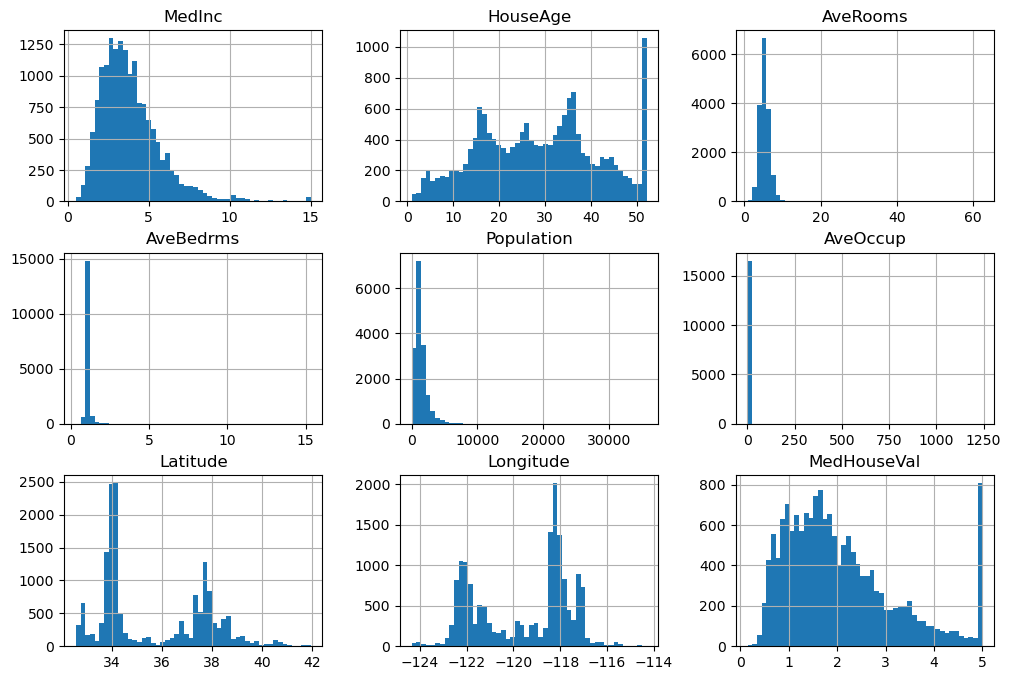

In [ ]:
# Plot histograms for all numerical columns in the training data
train_data.hist(bins=50, figsize=(12, 8))
plt.show()

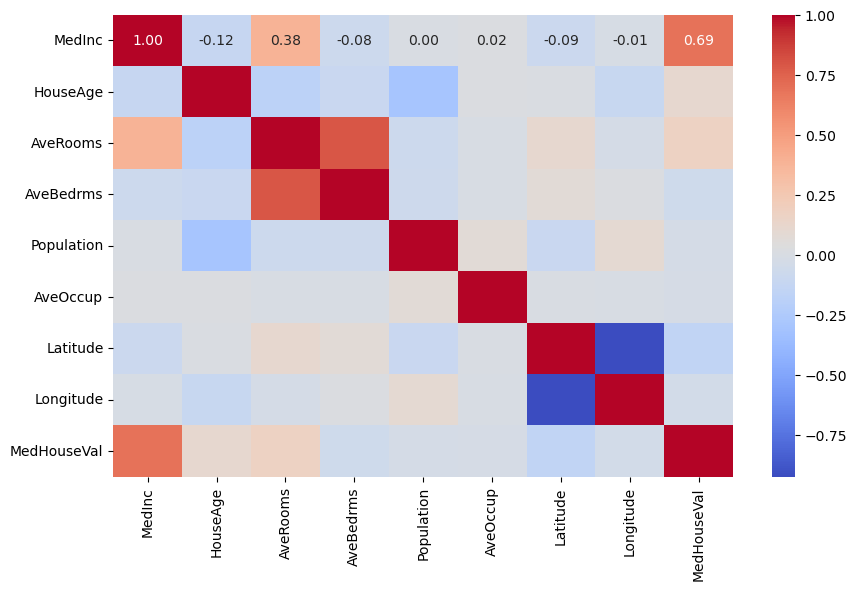

In [ ]:
# Plot a heatmap showing the correlation matrix of the training data
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [ ]:
# Split the training data into features (X_train) by dropping the 'MedHouseVal' column
# and set the target variable (y_train) as the 'MedHouseVal' column
X_train = train_data.drop(columns=['MedHouseVal'])
y_train = train_data['MedHouseVal']

# Similarly, split the test data into features (X_test) and target variable (y_test)
X_test = test_data.drop(columns=['MedHouseVal'])
y_test = test_data['MedHouseVal']

# Initialize a StandardScaler to standardize the feature values
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the test data
X_test_scaled = scaler.transform(X_test)



In [ ]:
# Setting up KFold cross-validation and defining an R² scorer
k_folds = KFold(n_splits=5, shuffle=True, random_state=40)
score = make_scorer(r2_score)

# Linear Regression model with hyperparameter grid search
lr_model = LinearRegression()
lr_param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
lr_grid_search = GridSearchCV(lr_model, lr_param_grid, cv=k_folds, scoring=score)
lr_grid_search.fit(X_train_scaled, y_train)
print("Best parameters from grid search:", lr_grid_search.best_params_)
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=k_folds, scoring=score)
print("5-Fold cross-validation R² scores:", lr_cv_scores)
print("Mean R² score:", lr_cv_scores.mean())

# Random Forest Regressor model with hyperparameter grid search
rf_model = RandomForestRegressor()
rf_param_grid = {'n_estimators': [200,300], 'max_depth': [20,40], 'min_samples_split': [2,4,8]}
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=k_folds, scoring=score)
rf_grid_search.fit(X_train_scaled, y_train)
print("Best parameters for Random Forest:", rf_grid_search.best_params_)
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=k_folds, scoring=score)
print("Random Forest 5-Fold cross-validation R² scores:", rf_cv_scores)
print("Mean R² score - Random Forest:", rf_cv_scores.mean())

# Orthogonal Matching Pursuit model with hyperparameter grid search
OMP_model = OrthogonalMatchingPursuit()
OMP_param_grid={'n_nonzero_coefs': list(range(1,9)), 'fit_intercept': [True, False]}
OMP_grid_search = GridSearchCV(OMP_model, OMP_param_grid, cv=k_folds, scoring=score)
OMP_grid_search.fit(X_train_scaled, y_train)
print("Best parameters for OrthogonalMatchingPursuit:", OMP_grid_search.best_params_)
OMP_cv_scores = cross_val_score(OMP_model, X_train_scaled, y_train, cv=k_folds, scoring=score)
print("5-Fold cross-validation R² scores OrthogonalMatchingPursuit :", OMP_cv_scores)
print("Mean R² score:", OMP_cv_scores.mean())

Best parameters from grid search: {'fit_intercept': True, 'positive': False}
5-Fold cross-validation R² scores: [0.60619729 0.59194161 0.6084202  0.60411186 0.61591285]
Mean R² score: 0.6053167609510453
Best parameters for Random Forest: {'max_depth': 40, 'min_samples_split': 4, 'n_estimators': 300}
Random Forest 5-Fold cross-validation R² scores: [0.78735095 0.81134904 0.8109547  0.79520418 0.79761467]
Mean R² score - Random Forest: 0.8004947106533951
Best parameters for OrthogonalMatchingPursuit: {'fit_intercept': True, 'n_nonzero_coefs': 7}
5-Fold cross-validation R² scores OrthogonalMatchingPursuit : [0.47862523 0.45135727 0.47517074 0.46754803 0.47947505]
Mean R² score: 0.470435262275214


In [ ]:
# Create a dictionary to store model names and their corresponding mean R² scores
cv_results = {
    "Model": ["Linear Regression", "Random Forest", "OrthogonalMatchingPursuit"],
    "Mean R²": [lr_cv_scores.mean(), rf_cv_scores.mean(), OMP_cv_scores.mean()]
}
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,Model,Mean R²
0,Linear Regression,0.605317
1,Random Forest,0.800495
2,OrthogonalMatchingPursuit,0.470435


## Part 4 - Training
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [ ]:
# LinearRegression
best_lr_model = lr_grid_search.best_estimator_
best_lr_model.fit(X_train_scaled, y_train)

# Random Forest
best_rf_model = rf_grid_search.best_estimator_
best_rf_model.fit(X_train_scaled, y_train)

# OrthogonalMatchingPursuit
best_OMP_model = OMP_grid_search.best_estimator_
best_OMP_model.fit(X_train_scaled, y_train)

OrthogonalMatchingPursuit(n_nonzero_coefs=7)

## Part 5 - Apply on test and show model performance estimation

In [ ]:
# Predict the target for test data (LinearRegression)
y_lr_pred = best_lr_model.predict(X_test_scaled)

# Random Forest predictions
y_rf_pred = best_rf_model.predict(X_test_scaled)

# OrthogonalMatchingPursuit predictions
y_OMP_pred = best_OMP_model.predict(X_test_scaled)

# Display first 5 predictions for each model
print("First 5 predictions - LinearRegression:", y_lr_pred[:5])
print("First 5 predictions - Random Forest:", y_rf_pred[:5])
print("First 5 predictions - OrthogonalMatchingPursuit:", y_OMP_pred[:5])

First 5 predictions - LinearRegression: [3.09515207 2.95032283 2.86341271 1.43713286 0.32911017]
First 5 predictions - Random Forest: [3.44910931 2.34009668 2.63294681 1.10066206 1.17517347]
First 5 predictions - OrthogonalMatchingPursuit: [3.09421426 2.95075435 2.86314204 1.43639767 0.32838246]


In [ ]:
# Linear Regression metrics
lr_r2 = r2_score(y_test, y_lr_pred)
lr_mse = mean_squared_error(y_test, y_lr_pred)
lr_sse = lr_mse * len(y_test)  #(MSE * number of samples)
print("\nLinear Regression model evaluation:")
print("R²:", lr_r2)
print("MSE:", lr_mse)
print("SSE:", lr_sse)

# Random Forest metrics
rf_r2 = r2_score(y_test, y_rf_pred)
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_sse = rf_mse * len(y_test)
print("\nRandom Forest model evaluation:")
print("R²:", rf_r2)
print("MSE:", rf_mse)
print("SSE:", rf_sse)

# OrthogonalMatchingPursuit metrics
OMP_r2 = r2_score(y_test, y_OMP_pred)
OMP_mse = mean_squared_error(y_test, y_OMP_pred)
OMP_sse = OMP_mse * len(y_test)
print("\nOrthogonalMatchingPursuit model evaluation:")
print("R²:", OMP_r2)
print("MSE:", OMP_mse)
print("SSE:", OMP_sse)


Linear Regression model evaluation:
R²: 0.604070344981614
MSE: 0.5371312855952766
SSE: 2217.2779469373017

Random Forest model evaluation:
R²: 0.8267997951164813
MSE: 0.23496913538878408
SSE: 969.9525908849007

OrthogonalMatchingPursuit model evaluation:
R²: 0.6040255171261686
MSE: 0.537192100548945
SSE: 2217.528991066045


In [ ]:
# Create a dictionary to store model names and their corresponding evaluation metrics
results = {
    "Model": ["Linear Regression", "Random Forest", "OrthogonalMatchingPursuit"],
    "R²": [lr_r2, rf_r2, OMP_r2],
    "MSE": [lr_mse, rf_mse, OMP_mse],
    "SSE": [lr_sse, rf_sse, OMP_sse]
}
results_df = pd.DataFrame(results)
results_df

,Model,R²,MSE,SSE
0,Linear Regression,0.604070,0.537131,2217.277947
1,Random Forest,0.826800,0.234969,969.952591
2,OrthogonalMatchingPursuit,0.604026,0.537192,2217.528991


In [ ]:
predictions_df = pd.DataFrame({'Actual': y_test[:5], 'Predicted': y_rf_pred[:5]})
print(predictions_df)

   Actual  Predicted
0   3.852   3.449109
1   2.457   2.340097
2   2.013   2.632947
3   1.052   1.100662
4   1.078   1.175173
